# Active acoustic data analysis for 18Hz **and** 38Hz data
**Explore data :** 
1) **Data structure** : NetCDF4 : its variables
2) **Time dimension** : How many sample by seasons / year ? At what time was the data recorded ?
3) **Space dimension** : Where was the data recorded ?
4) **Time and space dimensions** : The data at the time and location it was recorded

#### Imports

In [1]:
import netCDF4 as nc
from netCDF4 import Dataset
import os
import numpy as np
import matplotlib.pyplot as plt
from data_extraction_functions import get_datetime, get_season_from_datetime, get_channels

#### Open folder containing CDF files

In [2]:
folder_path = "../data/IMOS_18_and_38_Hz"
list_cdf_files = []

# Create list of nc files
for filename in os.listdir(folder_path) :
    if filename.endswith('.nc') : 
        filepath = os.path.join(folder_path, filename)
        list_cdf_files.append(filepath)

## Explore data

### 1) Data structure

#### Open CDF files

In [3]:
# File i
i = 3
cdf_file = list_cdf_files[i]

# Open file i
dataset=Dataset(cdf_file, mode='r')
print(dataset)

<class 'netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    abstract: IMOS Bioacoustics sub-Facility water column acoustic dataset from 46 S 113 E to Albany in Feb 2016. Data collected by Commonwealth Scientific and Industrial Research Organisation (CSIRO) using the platform Investigator.
    acknowledgement: Any users of IMOS data are required to clearly acknowledge the source of the material in the format: "Data was sourced from Australia’s Integrated Marine Observing System (IMOS) – IMOS is enabled by the National Collaborative Research Infrastructure Strategy (NCRIS). It is operated by a consortium of institutions as an unincorporated joint venture, with the University of Tasmania as Lead Agent".
    author: Amy Nau
    author_email: Amy.Nau@csiro.au
    cdm_data_type: Trajectory
    citation: The citation in a list of references is: "IMOS. [year-of-data-download], [Title], [data-access-URL], accessed [date-of-access]".
    contributor: Amy Nau
    convention_a

#### Extract data from CDF file

In [4]:
# Show variables of CDF file
variable_names = np.array(list(dataset.variables.keys()))
# Display number of variables and some of them
print("number of variables : ", variable_names.shape, "\n", variable_names[:10], "...")


number of variables :  (103,) 
 ['TIME' 'DEPTH' 'CHANNEL' 'EV_FILENAME' 'LATITUDE'
 'LATITUDE_quality_control' 'LONGITUDE' 'LONGITUDE_quality_control'
 'mean_height' 'mean_height_quality_control'] ...


In [11]:
# Extract variables from dataset
latitude = dataset.variables['LATITUDE'][:]
longitude = dataset.variables['LONGITUDE'][:]
depth = dataset.variables.get('DEPTH', dataset.variables.get('RANGE', None))[:]
sv = dataset.variables['Sv'][:]
time = get_datetime(dataset)
channel = get_channels(dataset)
period = dataset.variables['day'][:] # day/sunset/sunrise/night (à garder : day/night potentiellement)



In [13]:
# Display variables
print("Longitude : ", longitude[:2])
print("Latitude : ", latitude[:2])
print("Depth : ", depth[:2]) # 240 levels of depth, of shape (240,)
print("Sv : ", sv[:2]) # 2 or 4 channels, of shape(time, depth, channels)
print("Formatted date : ", time[:2])
print("channels : ", channel)
print("period : ", period[:2])
print("longitude : ", longitude.shape, ", latitude : ", latitude.shape, ", depth : ", depth.shape, ", sv : ",  sv.shape, ", date : ", time.shape, ", period : ", period.shape)


Longitude :  [113.40711649 113.40846409]
Latitude :  [-46.03107651 -46.03097876]
Depth :  [2.5 7.5]
Sv :  [[[-- -- -- --]
  [-- -- -- --]
  [1.4251009535307279e-08 1.7993472104585186e-09 2.601560962574836e-10
   6.629377720068183e-10]
  [5.3529213355558455e-09 4.275717890439519e-10 1.349206540226059e-10
   7.50824860770445e-10]
  [4.32738500734808e-09 2.478549721192458e-10 1.1644099853936697e-09
   3.640748170148223e-09]
  [5.91689904169285e-09 2.105906439237717e-10 1.0891821321558431e-09
   6.211816468599547e-09]
  [6.793754070042213e-11 1.5343597124062066e-10 9.245055043149355e-10
   3.2803609147071864e-09]
  [3.3720375679534637e-10 4.511390994393365e-10 1.158828204085987e-09
   2.0640098791746736e-09]
  [3.224605776517497e-10 3.6227144500915214e-10 5.260392707946192e-10
   1.866737981837771e-09]
  [3.524904116637041e-10 2.416905845465095e-09 9.867699040613258e-10
   4.18195760046629e-09]
  [3.896687289646881e-09 4.8330292969248316e-09 1.5779070363472848e-09
   2.6632205812826833e-09

#### Plot Echogram

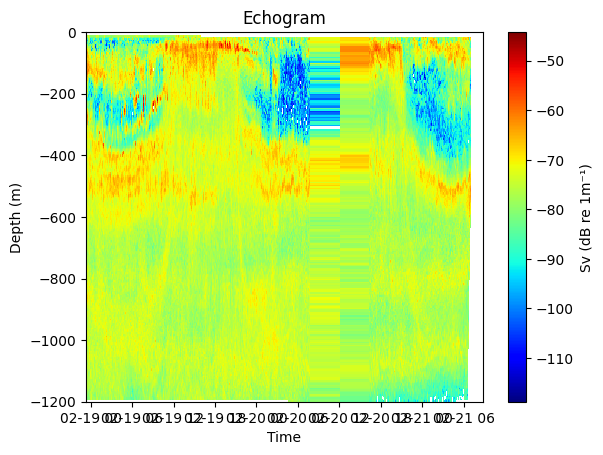

In [11]:
# Create figure
plt.figure()

# Select channel of sv 
channel = 0 # Channel = frequency of sonar
sv_data = sv[:, :, channel]

# Invert depth var
depth = depth[::-1]

# Plot
plt.pcolormesh(time, -depth, 10 * np.log10(sv_data.T), shading='auto', cmap='jet')

# Labels and title
plt.colorbar(label="Sv (dB re 1m⁻¹)")
plt.xlabel("Time")
plt.ylabel("Depth (m)")
plt.title("Echogram")
plt.show()

plt.show()

#### Close CDF file

In [14]:
dataset.close()

### 2) Time dimension

#### List avaible datasets by season/month/frequency

In [3]:
for i in range(len(list_cdf_files)):
    # Open file
    cdf_file = list_cdf_files[i]
    dataset=Dataset(cdf_file, mode='r')

    # Extract date
    times=get_datetime(dataset)
    seasons = get_season_from_datetime(dataset)
    print(times)
    print(seasons)
    
    # Close dataset
    dataset.close()

[datetime.datetime(2017, 3, 18, 16, 9, 59)
 datetime.datetime(2017, 3, 18, 16, 10, 18)
 datetime.datetime(2017, 3, 18, 16, 10, 37) ...
 datetime.datetime(2017, 3, 24, 10, 6, 20)
 datetime.datetime(2017, 3, 24, 10, 6, 37)
 datetime.datetime(2017, 3, 24, 10, 6, 54)]
['fall', 'fall', 'fall', 'fall', 'fall', 'fall', 'fall', 'fall', 'fall', 'fall', 'fall', 'fall', 'fall', 'fall', 'fall', 'fall', 'fall', 'fall', 'fall', 'fall', 'fall', 'fall', 'fall', 'fall', 'fall', 'fall', 'fall', 'fall', 'fall', 'fall', 'fall', 'fall', 'fall', 'fall', 'fall', 'fall', 'fall', 'fall', 'fall', 'fall', 'fall', 'fall', 'fall', 'fall', 'fall', 'fall', 'fall', 'fall', 'fall', 'fall', 'fall', 'fall', 'fall', 'fall', 'fall', 'fall', 'fall', 'fall', 'fall', 'fall', 'fall', 'fall', 'fall', 'fall', 'fall', 'fall', 'fall', 'fall', 'fall', 'fall', 'fall', 'fall', 'fall', 'fall', 'fall', 'fall', 'fall', 'fall', 'fall', 'fall', 'fall', 'fall', 'fall', 'fall', 'fall', 'fall', 'fall', 'fall', 'fall', 'fall', 'fall', 'fall'

KeyboardInterrupt: 